In [1]:
import pandas as pd
import numpy as np 		#for array operations like multiplication, division, addition, and subtraction
import matplotlib.pyplot as plt	#for plotting the results
plt.rcParams['font.family'] ='SimHei'	#sets default font to sans-serif
f1 = pd.read_excel("D:\实验及上课文件\化工原理实验\过滤.xlsx",sheet_name='p=0.03')
f1.head()


,t/min,滤液质量/kg,t-t1,V,q,t-t1/q-q1,q+q1
0,0.0,0.000,NaN,NaN,NaN,NaN,NaN
1,0.5,0.097,0.0,0.000095,0.006849,NaN,NaN
2,1.0,0.176,0.5,0.000173,0.012426,89.642926,0.019275
3,1.5,0.252,1.0,0.000247,0.017792,91.377950,0.024641
4,2.0,0.319,1.5,0.000313,0.022523,95.699880,0.029371


In [2]:
f2 = pd.read_excel("D:\实验及上课文件\化工原理实验\过滤.xlsx",sheet_name='p=0.05')
f2.head()

,t/min,滤液质量/kg,t-t1,V,q,q-q1,(t-t1)/(q-q1),q+q1
0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,0.5,0.131,0.0,0.000128,0.009249,0.000000,NaN,NaN
2,1.0,0.243,0.5,0.000238,0.017157,0.007908,63.230278,0.026406
3,1.5,0.342,1.0,0.000335,0.024146,0.014897,67.125982,0.033396
4,2.0,0.433,1.5,0.000425,0.030571,0.021322,70.348919,0.039820


In [3]:
f11 = f1.iloc[2:,[5,6]]
f11.head()


,t-t1/q-q1,q+q1
2,89.642926,0.019275
3,91.377950,0.024641
4,95.699880,0.029371
5,99.393560,0.033819
6,103.233107,0.037914


In [4]:
f22 =  f2.iloc[2:,[7,6]]
f22.head()

,q+q1,(t-t1)/(q-q1)
2,0.026406,63.230278
3,0.033396,67.125982
4,0.039820,70.348919
5,0.045469,74.154881
6,0.050764,77.481304


In [5]:
k1, b1= np.polyfit(f11['q+q1'], f11['t-t1/q-q1'],1)

y2 = np.poly1d(np.polyfit(f11['q+q1'], f11['t-t1/q-q1'],1))
y2

poly1d([1054.38549764,   61.22727369])

In [6]:
k2, b2= np.polyfit(f22['q+q1'],f22['(t-t1)/(q-q1)'],1)

y3 = np.poly1d(np.polyfit(f22['q+q1'],f22['(t-t1)/(q-q1)'],1))
y3(4)

3162.780500120912

In [7]:
from scipy import stats
r1, p1 = stats.pearsonr(f11['q+q1'], f11['t-t1/q-q1'])
r1


0.9972095995903099

In [8]:
r2, p2 = stats.pearsonr(f22['q+q1'], f22['(t-t1)/(q-q1)'])
r2


0.9788711090263755

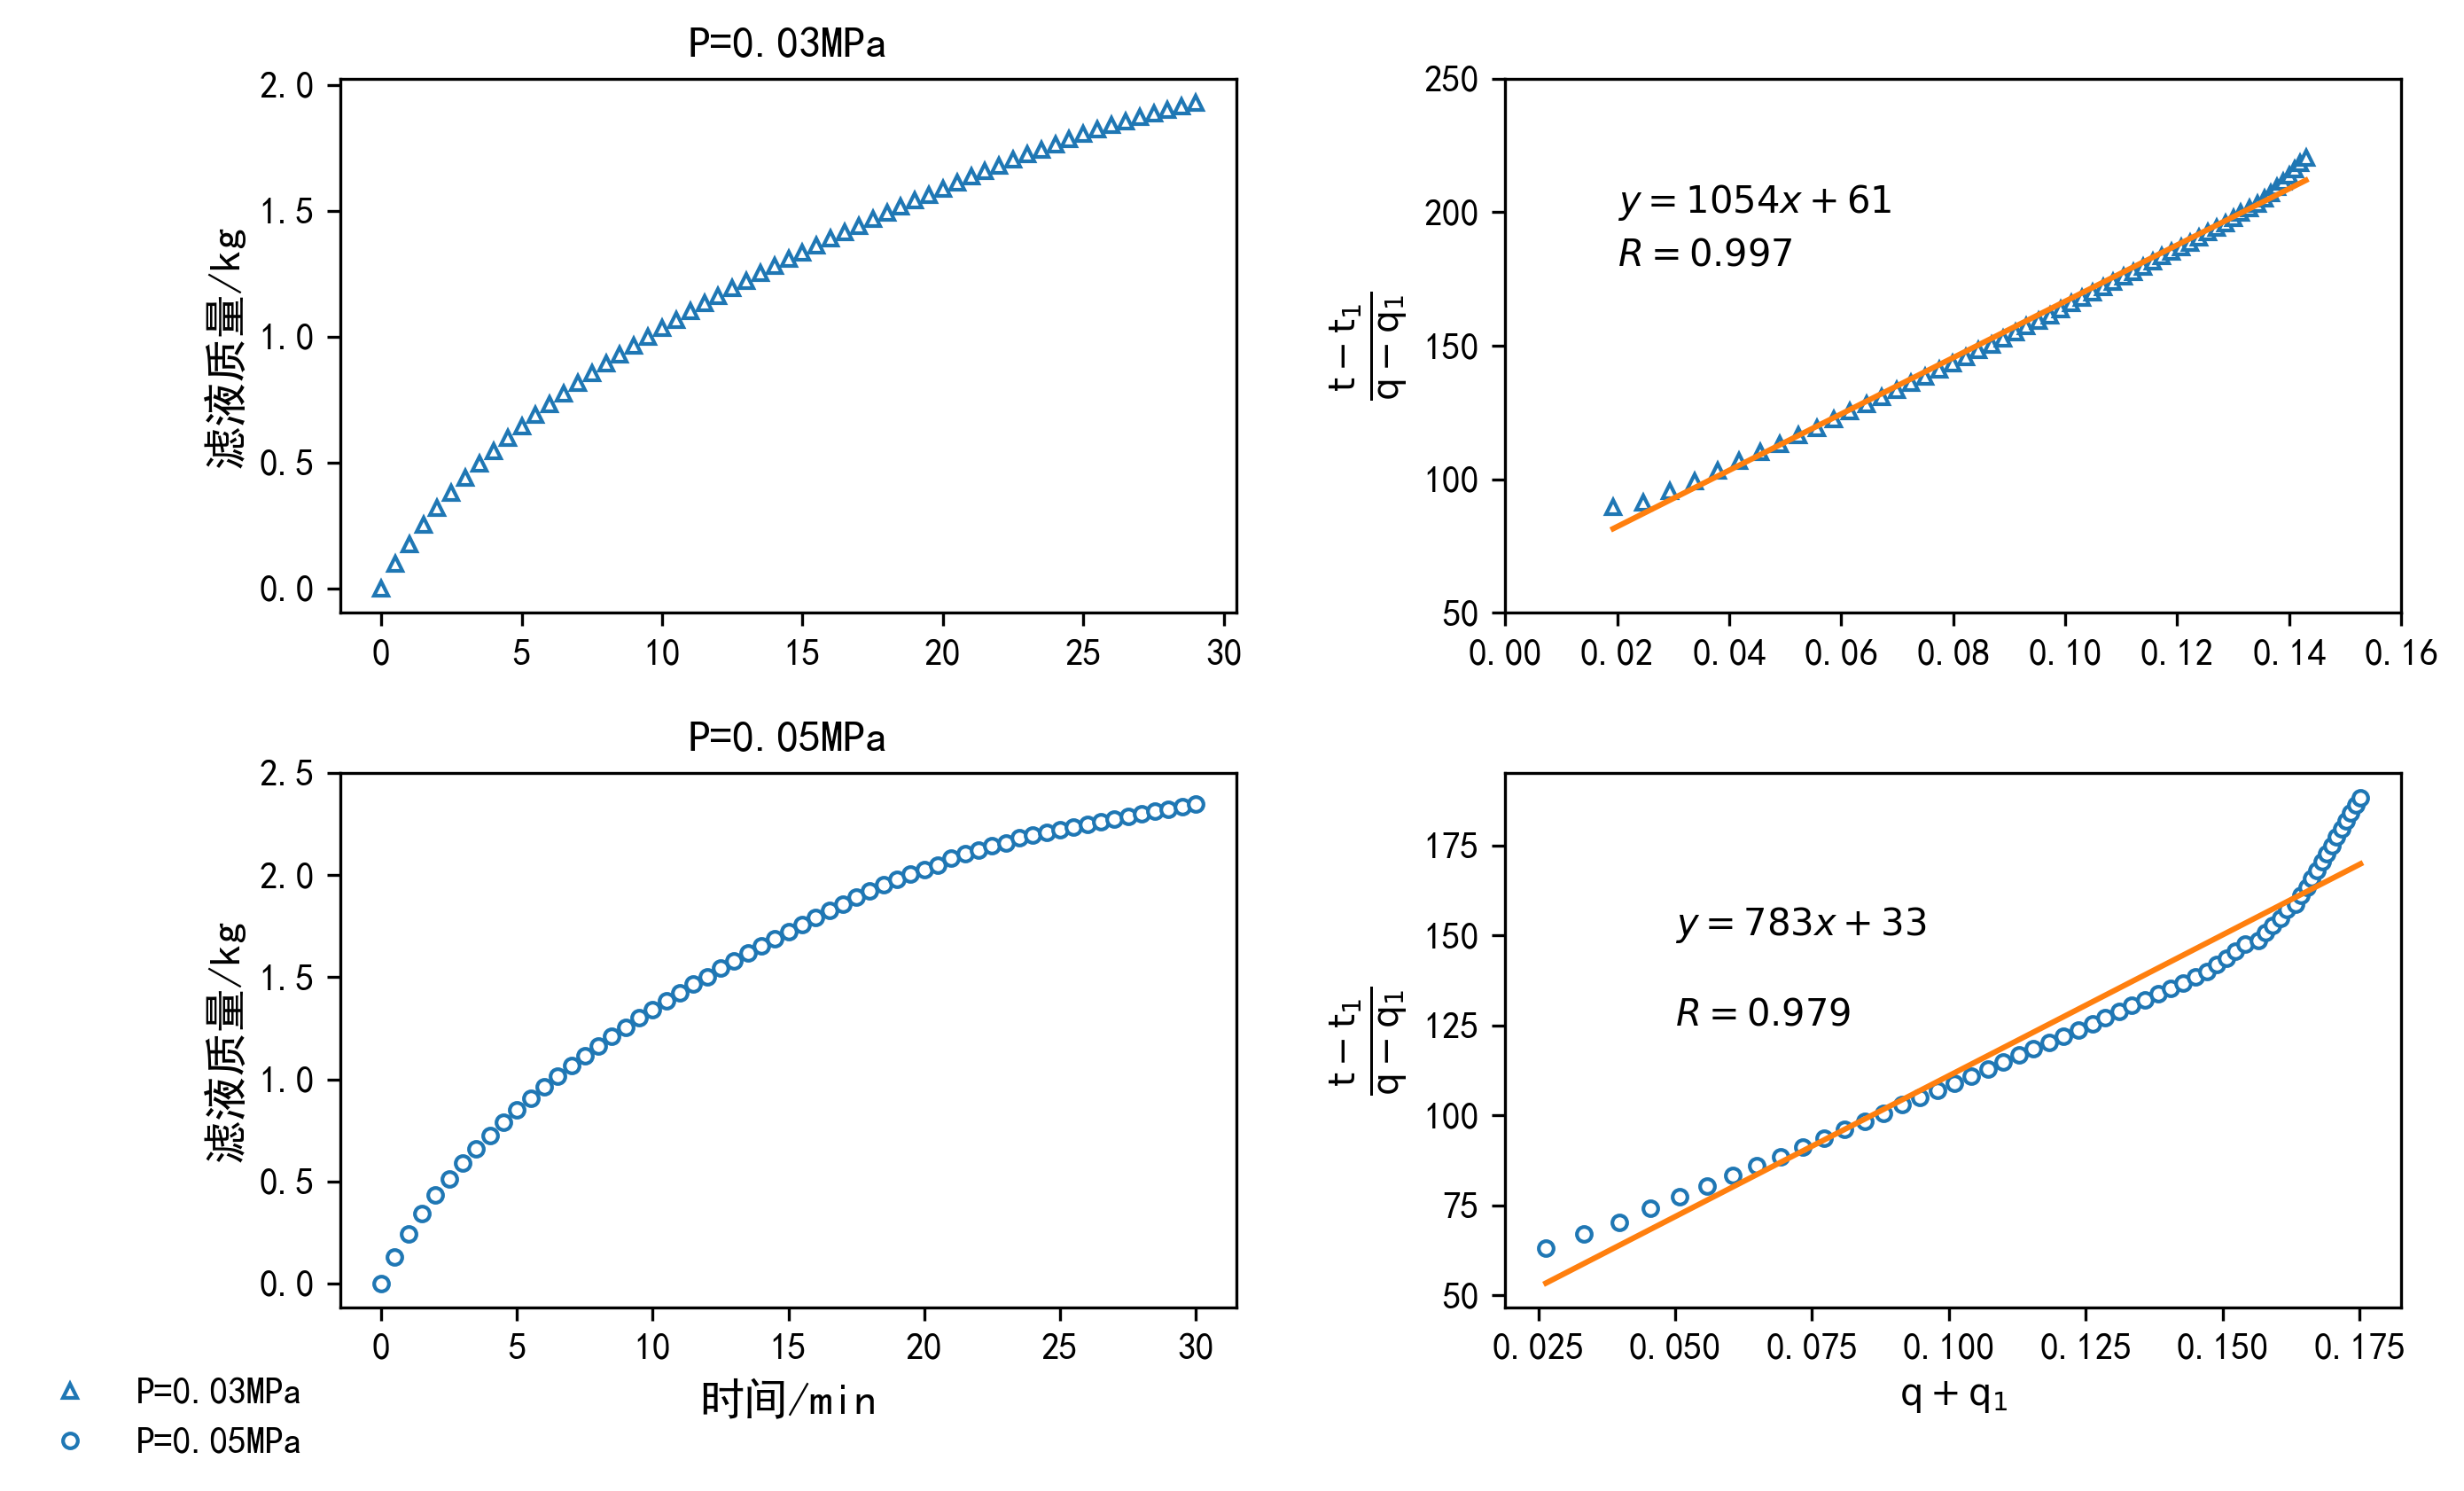

In [9]:

fig, ax = plt.subplots(2,2,figsize=(10,6),dpi=300,
                )
fig.subplots_adjust(hspace=0.3, wspace=0.3)


ax1 = ax[0][0]
ax1.plot(f1['t/min'],f1['滤液质量/kg'],'^',markersize=4,markerfacecolor='white',label='P=0.03MPa')
ax1.set(title='P=0.03MPa',
        
       

)
ax1.set_ylabel('滤液质量/kg',fontsize=12)


ax2 = ax[1][0]
ax2.plot(f2['t/min'],f2['滤液质量/kg'],'o',markersize=4,markerfacecolor='white',label='P=0.05MPa')
ax2.set(title='P=0.05MPa')
ax2.set(
)
ax2.set_ylabel('滤液质量/kg',fontsize=12)
ax2.set_ylim(top=2.5)
ax2.set_xlabel('时间/min',fontsize=12) 	#for better readability, change the fontsize of x-label and y
# fig.legend()

ax3 = ax[0][1]
ax3.plot(f11['q+q1'],f11['t-t1/q-q1'],'^',markersize=4,markerfacecolor='white' )
ax3.set_ylabel(r'$\mathrm{\frac{t-t_1}{q-q_1}}$',fontsize=14)
ax3.set_xlim(0,0.16)
ax3.set_ylim(50,250)
ax3.plot(f11['q+q1'],y2(f11['q+q1']), )
ax3.text(0.02,200,rf'$y={round(k1)}x+{round(b1)}$')
ax3.text(0.02,180,rf'$R={r1:.3f}$')


ax4 = ax[1][1]
ax4.plot(f22['q+q1'],f22['(t-t1)/(q-q1)'],'o',markersize=4,markerfacecolor='white')
ax4.set_xlabel(r'$\mathrm{q+q_1}$')
ax4.set_ylabel(r'$\mathrm{\frac{t-t_1}{q-q_1}}$',fontsize=14,rotation=90)
ax4.plot(f22['q+q1'],y3(f22['q+q1']), )
ax4.text(0.05,150,rf'$y={round(k2)}x+{round(b2)}$')
ax4.text(0.05,125,rf'$R={r2:.3f}$',)
fig.legend(frameon=False,loc='lower left')
fig.savefig('./picture/过滤.jpg',dpi=600)

In [10]:
f11 = f1.iloc[2:,[5,6]]
f11.head()


,t-t1/q-q1,q+q1
2,89.642926,0.019275
3,91.377950,0.024641
4,95.699880,0.029371
5,99.393560,0.033819
6,103.233107,0.037914
